<a href="https://colab.research.google.com/github/SuperVerkaufer/R-lookalike-modelling/blob/main/R_lookalike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Re-write python code for lookalike modelling in R
%load_ext rpy2.ipython

In [6]:
%%R
# Install packages
#install.packages("ggplot2", dependencies = TRUE)
install.packages("dplyr", dependencies = TRUE)
install.packages("randomForest", dependencies = TRUE)
install.packages("caret", dependencies = TRUE)

# Import necessary libraries
#library(ggplot2)
#library(dplyr)
#library(randomForest)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpsUT7Ib/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpsUT7Ib/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpsUT7Ib/downloaded_packages’



In [7]:
%%R
# Import necessary libraries
#library(ggplot2)
library(dplyr)
library(randomForest)
library(caret)


Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




Attaching package: ‘randomForest’



    combine



Attaching package: ‘ggplot2’



    margin





In [4]:
%%R
# Read the dataset
click <- read.csv("ad_click_dataset.csv")

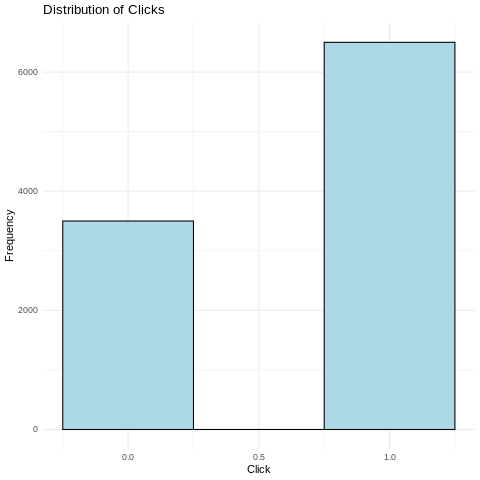

In [9]:
%%R
# Distribution of outcome variable
ggplot(click, aes(x = click)) +
  geom_histogram(binwidth = 0.5, fill = "lightblue", color = "black") +
  labs(title = "Distribution of Clicks", x = "Click", y = "Frequency") +
  theme_minimal()

In [10]:
%%R
table(click$click)


   0    1 
3500 6500 


In [11]:
%%R
# Explore head
head(click, 10)

     id full_name age     gender device_type ad_position browsing_history
1   670   User670  22                Desktop         Top         Shopping
2  3044  User3044  NA       Male     Desktop         Top                 
3  5912  User5912  41 Non-Binary                    Side        Education
4  5418  User5418  34       Male                            Entertainment
5  9452  User9452  39 Non-Binary                             Social Media
6  5942  User5942  NA Non-Binary                  Bottom     Social Media
7  7808  User7808  26     Female     Desktop         Top                 
8  5065  User5065  40       Male      Mobile        Side                 
9  7993  User7993  NA Non-Binary      Mobile      Bottom     Social Media
10 4509  User4509  NA                             Bottom        Education
   time_of_day click
1    Afternoon     1
2                  1
3        Night     1
4      Evening     1
5      Morning     0
6      Evening     1
7                  1
8      Evening    

In [12]:
%%R
# Feature stats & data type
summary(click)


       id         full_name              age          gender         
 Min.   :    5   Length:10000       Min.   :18.0   Length:10000      
 1st Qu.: 2529   Class :character   1st Qu.:29.0   Class :character  
 Median : 5218   Mode  :character   Median :39.5   Mode  :character  
 Mean   : 5060                      Mean   :40.2                     
 3rd Qu.: 7466                      3rd Qu.:52.0                     
 Max.   :10000                      Max.   :64.0                     
                                    NA's   :4766                     
 device_type        ad_position        browsing_history   time_of_day       
 Length:10000       Length:10000       Length:10000       Length:10000      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                       

In [13]:
%%R
# Feature stats & data type
str(click)

'data.frame':	10000 obs. of  9 variables:
 $ id              : int  670 3044 5912 5418 9452 5942 7808 5065 7993 4509 ...
 $ full_name       : chr  "User670" "User3044" "User5912" "User5418" ...
 $ age             : num  22 NA 41 34 39 NA 26 40 NA NA ...
 $ gender          : chr  "" "Male" "Non-Binary" "Male" ...
 $ device_type     : chr  "Desktop" "Desktop" "" "" ...
 $ ad_position     : chr  "Top" "Top" "Side" "" ...
 $ browsing_history: chr  "Shopping" "" "Education" "Entertainment" ...
 $ time_of_day     : chr  "Afternoon" "" "Night" "Evening" ...
 $ click           : int  1 1 1 1 0 1 1 0 1 1 ...


In [14]:
%%R
colSums(click == "" | is.na(click))

              id        full_name              age           gender 
               0                0             4766             4693 
     device_type      ad_position browsing_history      time_of_day 
            2000             2000             4782             2000 
           click 
               0 


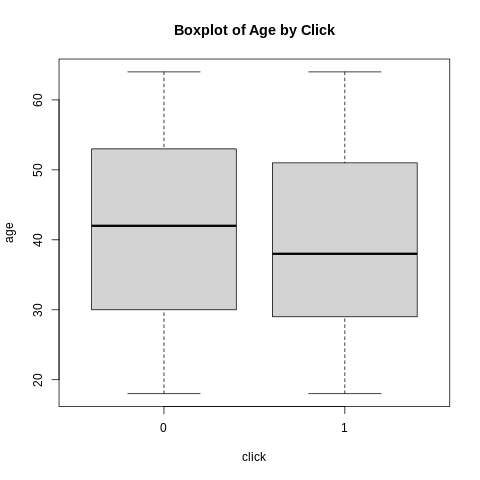

In [5]:
%%R
# The younger audience more predisposed to click. Hence, Age has to be one of the predictors


# Distribution of outcome variable
#ggplot(click, aes(x = click)) +
  #geom_histogram(binwidth = 0.5, fill = "lightblue", color = "black") +
  #labs(title = "Distribution of Clicks", x = "Click", y = "Frequency") +
  #theme_minimal()

# Boxplot of age by click
boxplot(age ~ click, data = click, main = "Boxplot of Age by Click")

# Scatterplot of browsing history by click
#plot(click ~ browsing_history, data = click, main = "Scatterplot of Browsing History by Click")

In [16]:
%%R
# Install and load necessary libraries in order to IMPUTE AGE
#if (!require(mice)) install.packages("mice")
#library(mice)

# IMPUTE MISSING VALUES in 'age' using mice
#imputed_data <- mice(click[, "age", drop = FALSE], m = 5, maxit = 10, method = "pmm", seed = 0)

# Extract the completed dataset with imputed values
#click$age <- complete(imputed_data, 1)  # Use the first imputed dataset

# IMPUTE NA in age as mean age
click$age[is.na(click$age)] <- mean(click$age, na.rm = TRUE)

In [17]:
%%R
# Function to replace blanks with most frequent value
replace_blanks_with_most_frequent <- function(x) {
  # Identify blanks and replace with most frequent (excluding blanks)
  most_frequent <- names(which.max(table(x[x != ""])))
  x[x == ""] <- most_frequent
  return(x)
}

# Apply replacement to specified columns
click[, c("device_type", "ad_position", "browsing_history", "time_of_day")] <-
  lapply(click[, c("device_type", "ad_position", "browsing_history", "time_of_day")],
         replace_blanks_with_most_frequent)

In [18]:
%%R
# Extract the completed da
colSums(click == "" | is.na(click))

              id        full_name              age           gender 
               0                0                0             4693 
     device_type      ad_position browsing_history      time_of_day 
               0                0                0                0 
           click 
               0 


In [19]:
%%R
# Select relevant features and target variable
data <- click[, c("id", "age", "device_type", "ad_position", "browsing_history", "time_of_day", "click")]
# Convert categorical features to factors
data$device_type <- as.factor(data$device_type)
data$ad_position <- as.factor(data$ad_position)
data$browsing_history <- as.factor(data$browsing_history)
data$time_of_day <- as.factor(data$time_of_day)

In [20]:
%%R
# Split data into training and testing sets
set.seed(42) # For reproducibility
trainIndex <- createDataPartition(data$click, p = 0.7, list = FALSE)
trainData <- data[trainIndex, ]
testData <- data[-trainIndex, ]

In [21]:
%%R
# Model Training
# Train a random forest classifier
rfModel <- randomForest(click ~ ., data = trainData, ntree = 100)

# Model Prediction
# Predict on the testing set
predictions <- predict(rfModel, newdata = testData, type = "response")
predictions <- as.numeric(as.character(predictions))
binary_predictions <- ifelse(predictions > 0.5, 1, 0) # Assuming column "1" has probabilities for class 1
# Model Evaluation [, "click"]
# Evaluate model performance
# CAB'T FIGURE OUT WHY PREDICTED CLICK AND ACTUAL CLICK HAVE DIFFERENT LEVELS - one is numeric and the other is int

In [22]:
%%R
#head(binary_predictions, 10)
head(testData, 10)
#head(predictions, 10)

     id      age device_type ad_position browsing_history time_of_day click
6  5942 40.19736     Desktop      Bottom     Social Media     Evening     1
10 4509 40.19736     Desktop      Bottom        Education   Afternoon     1
12 7466 47.00000      Mobile      Bottom    Entertainment   Afternoon     1
14 2023 19.00000     Desktop      Bottom    Entertainment     Morning     1
20 7335 24.00000      Tablet        Side    Entertainment       Night     0
21 5569 40.19736      Mobile      Bottom    Entertainment   Afternoon     1
28 5055 45.00000     Desktop      Bottom        Education     Morning     1
33 6862 40.19736      Tablet        Side    Entertainment     Morning     1
34 4985 37.00000      Mobile         Top             News     Evening     0
36 1524 24.00000      Mobile      Bottom    Entertainment       Night     1


In [23]:
%%R
# Convert binary_predictions to a factor with the same levels as testData$click
#binary_predictions <- factor(binary_predictions, levels = levels(testData$click))
binary_predictions <- factor(binary_predictions)
testData$click <- factor(testData$click)

# Check levels of binary_predictions
levels(binary_predictions)

# Check levels of testData$click
levels(testData$click)

[1] "0" "1"


In [24]:
%%R
# Produce confusionMatrix to assess accuracy. The model built in R has lower accuracy,
# 0.669 vs 0.708 (Python built model), although precision is higher in R, but recall & F1 is much poorer
confusionMatrix(binary_predictions, testData$click)


Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0  500   55
         1  545 1900
                                          
               Accuracy : 0.8             
                 95% CI : (0.7852, 0.8142)
    No Information Rate : 0.6517          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5055          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.4785          
            Specificity : 0.9719          
         Pos Pred Value : 0.9009          
         Neg Pred Value : 0.7771          
             Prevalence : 0.3483          
         Detection Rate : 0.1667          
   Detection Prevalence : 0.1850          
      Balanced Accuracy : 0.7252          
                                          
       'Positive' Class : 0               
                        

In [25]:
%%R
# Produce confusionMatrix to assess accuracy. The model built in R has higher accuracy,
# 0.8 vs 0.708 (Python built model), although precision is higher in R, but recall & F1 is poorer
confusionMatrix(binary_predictions, testData$click)

# Calculate confusion matrix
conf_matrix <- confusionMatrix(binary_predictions, testData$click)

# Extract precision, recall, and F1 score
precision <- conf_matrix$byClass['Pos Pred Value']
recall <- conf_matrix$byClass['Sensitivity']
f1_score <- conf_matrix$byClass['F1']

# Print the results
print(paste("Precision:", precision))
print(paste("Recall:", recall))
print(paste("F1 Score:", f1_score))


[1] "Precision: 0.900900900900901"
[1] "Recall: 0.478468899521531"
[1] "F1 Score: 0.625"


In [26]:
%%R
# Lookalike Identification
# Identify potential lookalikes (e.g., those with high predicted probability of clicking)
#testData$predicted_probability <- predict(rfModel, newdata = testData, type = "prob")[, "1"]
#lookalikes <- testData[testData$predicted_probability > 0.7, ] # Adjust threshold as needed

# Assuming 'customer_id_test', 'y_pred', and 'y_testNEW' are your variables
predictions_df <- data.frame(
  `Customer ID` = testData$id,
  `Predicted Click` = binary_predictions,
  `Actual Click` = testData$click
)

# Display the predictions data frame
head(predictions_df,10)

   Customer.ID Predicted.Click Actual.Click
1         5942               1            1
2         4509               1            1
3         7466               1            1
4         2023               1            1
5         7335               0            0
6         5569               1            1
7         5055               1            1
8         6862               1            1
9         4985               0            0
10        1524               1            1
